# Lauren Wright
## Consumer Complaints
### Capstone Project for Code Louisville - Python and SQL for Data Analysis
[Helpful Markdown Tips](http://nestacms.com/docs/creating-content/markdown-cheat-sheet)

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 

# SQLite Database
Original data was downloaded from data.gov. I have broken down the data into following CSVs, which have been imported into the SQLite Database included with this notebook:
* monetary.csv
* Consumer_Complaints_states_all_response.csv

# SQLite Connection
In this section, we will:
* Establisch a connection to our SQLite Database
* Open a cursor, allowing us to query the database directly using SQL commands from within our Jupyter Notebook (python)
* Pass a SQL statement as a python string variable
* Pass our SQL statement and database connection to obtain a pandas dataframe
* Commit all transactions - In this case, we are not modifying data, so committing our transactions is not necessary, but good practice.
* Lastly, we will close our database connection

In [75]:
# SQLite Connection
conn = sqlite3.connect("LaurenDB.db")
cur = conn.cursor()
#---------------------------------------------------------------------#

#Create the SQL Query String and Save it to a variable
sql_monetary = "SELECT * FROM monetary ORDER BY CAST(monetary_relief AS NUMERIC) DESC"
#Pass the SQL String and connection to a pandas dataframe
monetary = pd.read_sql_query(sql_monetary, conn)

#Create the SQL Query String and Save it to a variable
sql_complaints_all_df = "SELECT * FROM Consumer_Complaints_states_all_response ORDER BY CAST(Response AS NUMERIC) ASC"
#Pass the SQL String and connection to a pandas dataframe
complaints_all_df = pd.read_sql_query(sql_complaints_all_df, conn)

conn.commit()
conn.close()

## Inspect Newly Imported DataFrames

In [76]:
#View the Head of the monetary dataframe.  At first glance, the data looks alright.
monetary.head()

,StateUS,monetary_relief
0,CA,8588
1,NY,5395
2,FL,5369
3,TX,4055
4,NJ,2831


In [77]:
#View the Head of the complaints_all_df dataframe.  At first glance, the data looks alright.
complaints_all_df.head()

,StateUS,Response
0,PW,13
1,UNITED STATES MINOR OUTLYING ISLANDS,15
2,AA,18
3,AS,27
4,MH,30


## Inspect Datatypes of DataFrames and Columns
In this section, we will inspect the data types of our DataFrames and columns.  Graphing and calculations will require numeric datatypes.  If we do not have the correct type of data, we will need to make conversions.

In [78]:
#Inspect type of complaints_all_df.  It's a dataframe.
type(complaints_all_df)

pandas.core.frame.DataFrame

In [79]:
#Gather information about the complaints_all_df dataframe.
#We observer Response is of type 64 non-null object.  We will need this column to be numeric for graphing purposes.
complaints_all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
StateUS     64 non-null object
Response    64 non-null object
dtypes: object(2)
memory usage: 1.1+ KB


In [80]:
#Inspect the data types of the columns in complaints_all_df
#Again, we see Response is an object, not a float or integer, etc.
complaints_all_df.dtypes

StateUS     object
Response    object
dtype: object

## Convert Data Types 

In [81]:
#We can apply a numeric conversion to the Response column of the complaints_all_df dataframe.
#We will store this converted column in a new dataframe.
#There is only one column in this new dataframe.
complaints_all_df_Response = complaints_all_df[['Response']].apply(pd.to_numeric)

In [82]:
#We will now return to our original dataframe, complaints_all_df, and set the original Response column with the numeric version we just created.
complaints_all_df['Response'] = complaints_all_df_Response['Response']

In [83]:
#The heading of the modified dataframe looks fine.
complaints_all_df.head()

,StateUS,Response
0,PW,13
1,UNITED STATES MINOR OUTLYING ISLANDS,15
2,AA,18
3,AS,27
4,MH,30


In [84]:
#Now check the data types.
#Good, we wanted Response converted to something numeric. In this case, an integer.
complaints_all_df.dtypes

StateUS     object
Response     int64
dtype: object

# Complaint Responses By State

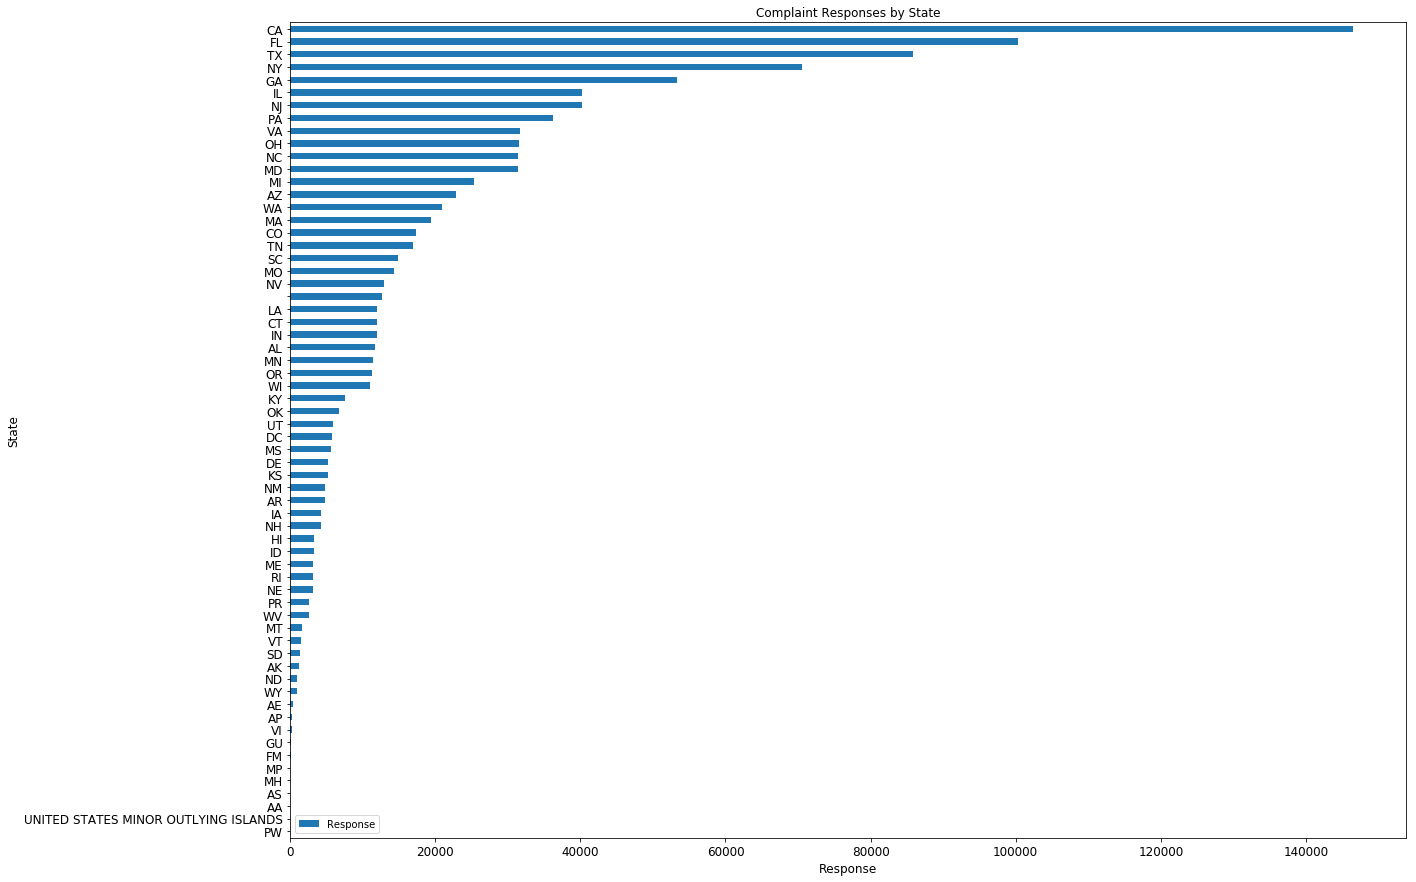

In [85]:
ax = complaints_all_df[['StateUS','Response']].plot(kind='barh', title ='Complaint Responses by State', figsize=(20, 15), legend=True, fontsize=12)
ax.set_yticklabels(complaints_all_df.StateUS)
ax.set_xlabel("Response", fontsize=12)
ax.set_ylabel("State", fontsize=12)
plt.show()

In [86]:
#Based on the naming convention below, we will set monetary to the variable name already in use.
complaints_money_df = monetary

## Repeat the Data Inspection and Conversion Process

In [87]:
complaints_money_df.dtypes

StateUS            object
monetary_relief    object
dtype: object

In [88]:
complaints_money_df_monetary_relief = complaints_money_df[['monetary_relief']].apply(pd.to_numeric)

In [89]:
complaints_money_df['monetary_relief'] = complaints_money_df_monetary_relief['monetary_relief']

In [90]:
complaints_money_df.dtypes

StateUS            object
monetary_relief     int64
dtype: object

# Monetary Relief by State

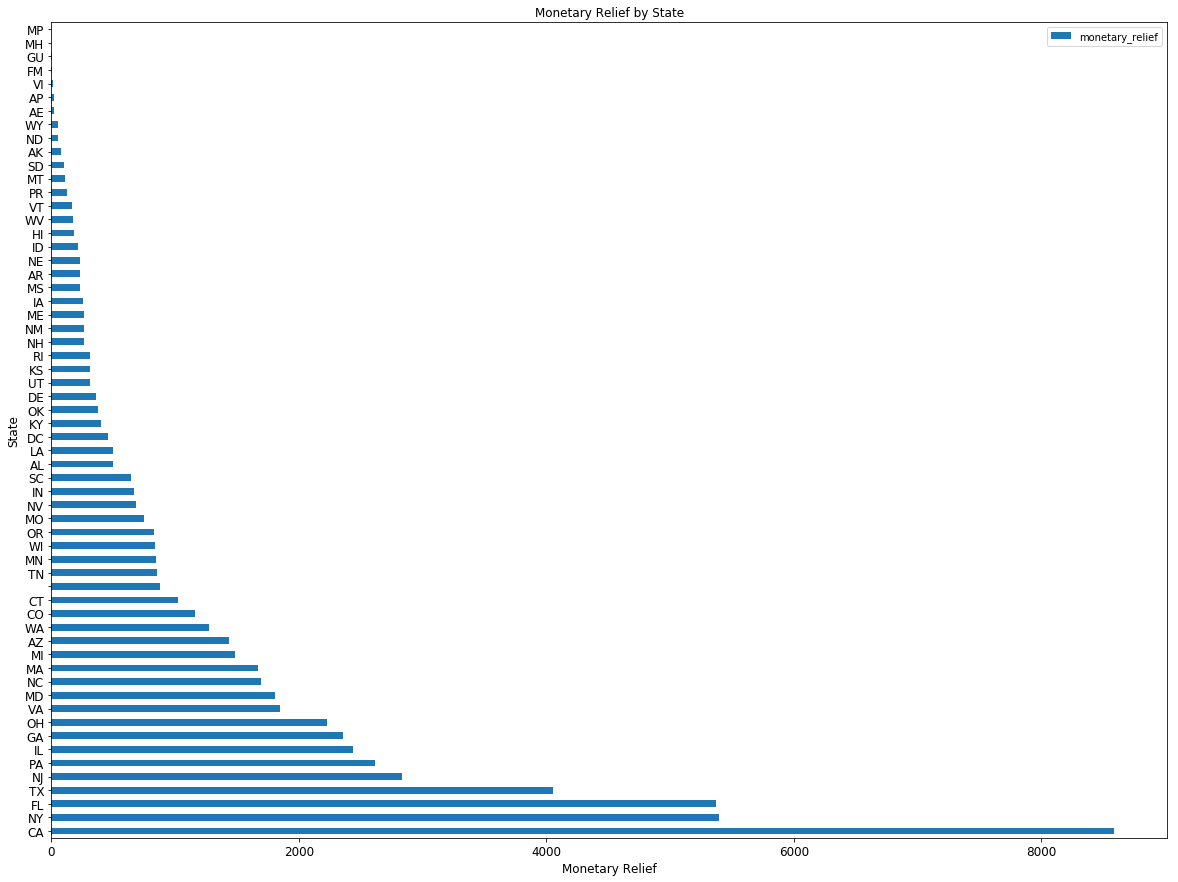

In [91]:
ax = complaints_money_df[['StateUS','monetary_relief']].plot(kind='barh', title ='Monetary Relief by State', figsize=(20, 15), legend=True, fontsize=12)
ax.set_yticklabels(complaints_money_df.StateUS)
ax.set_xlabel("Monetary Relief", fontsize=12)
ax.set_ylabel("State", fontsize=12)
plt.show()


# Results Summary

* Consumer complaints and the frequency of recieving monetary relief

* Code Louisville Python Project

* You will need: Jupyter Notebook Numpy Matplotlib Pandas

* My question was: Which state had the highest amount of consumer complaints and which state recieved the most closed with monetary relief responses from companies.

* I isolated the reponses from the original dataset into one file and the monetary reponses by state into another file and sorted them in descending order by reponses. By sheer number of complaints and monetary responses California definitely won out, but that's not surprising given the population size of California.

* To go further with this project after class it would be interesting to see this data laid out after adjusted for population size because while California